# Punto 1
## Implementaciones con FFT:


Librerías y definición de parámetros

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import time 

In [2]:
#Definición de unidades
    #Escalas
um=1e-6
mm=1e-3
nm=1e-9
    #Tamaño imagen
N=200
M=200
    #longitud de onda
w_length=632*nm
    #Tamaño de pixel
dx=dy=1*um #equivalencia con el mundo físico

Abertura de prueba para las implementaciones con FFT

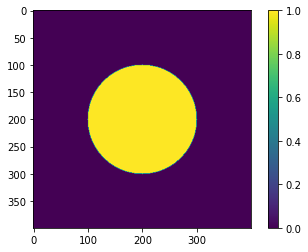

In [3]:
mask2 = np.zeros((400,400),dtype="uint8")
coordy=int((400,400)[0]/2)
coordx=int((400,400)[1]/2)

cv2.circle(mask2,(coordy,coordx),100,1,-1)
plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

### - Espectro Angular

In [4]:
def A_apx(U_f,dx_f,dy_f,z_f,wave_length):
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(1/(M_f*dx_f)) 
    fY=Y*(1/(N_f*dy_f))
    
    k= 2*np.pi/wave_length
    C1 = 1j*z_f*k

    matriz = np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))

    freq_p = U_freq*matriz
    #plt.figure()
    #plt.imshow(np.angle(
    #matriz))
        
   # plt.show()
    
    return freq_p

Resultado

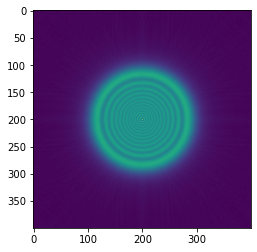

In [5]:
z2=632*um
A_prop=A_apx(mask2,dx,dy,z2,w_length)

dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(
    np.abs(dodoco_prop)
        )
plt.show()

### -Transformada de Fresnel

In [6]:
def T_fre(U_f,dx_f,dy_f,z_f,wave_length):
    
    k= 2*np.pi/wave_length
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(dx_f) 
    fY=Y*(dy_f)
    U_prima=(U_f*np.exp((-1j*k/(2*z_f))*((fX**2)+(fY**2)))) #U'
    U_dprima=np.fft.fftshift(np.fft.fft2(U_prima*dx_f**2)) #U''
    
    C1=np.exp(1j*k*z_f)/(1j*wave_length*z_f) #e^(ikz)/ilambda z
    C2=(1j*k)/(2*z_f)#ik/2 z
    
    fXs=X*(wave_length*z_f/(N_f*dx_f))
    fYs=Y*(wave_length*z_f/(M_f*dy_f))
    
    U_sal=C1*np.exp(C2*(fXs**2+fYs**2))*U_dprima

    #plt.figure()
    #plt.imshow(np.angle(
    #U_prima))    
    #plt.show()
  
    #plt.figure()
    #plt.imshow(np.angle(U_dprima))    
    #plt.show()
    
    #plt.figure()
    #plt.imshow(np.angle(U_sal))    
    #plt.show()
    
    return U_sal

Resultado

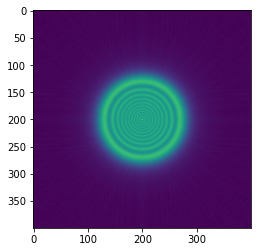

In [7]:
z2=742*um
T_prop=T_fre(mask2,dx,dy,z2,w_length)

plt.figure()
plt.imshow( 
    np.abs(T_prop)
        )
plt.show()

## Implementación con DFT y Comparación

Abertura de prueba para las implementaciones con DFT y comparación

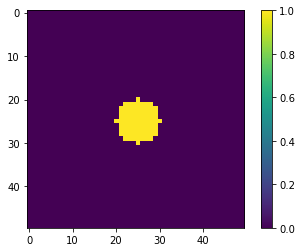

In [8]:
mask2 = np.zeros((50,50),dtype="uint8")
coordy=int((50,50)[0]/2)
coordx=int((50,50)[1]/2)

cv2.circle(mask2,(coordy,coordx),5,1,-1)
plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

### - Espectro Angular

Función DFT

In [9]:
def DFT(mat): #este es que funciona
    M,N= len(mat), len(mat[0]) #Captura el tamano de mat
    F = [([0]*N) for i in range(M)] #Crea una matriz de zeros de igual tamano que mat
    for fila in range(0,M): #Correr  por las filas de salida
        for ele in range(0,N): #Correr por las columnas de salida
            H= [([0]*N) for i in range(M)] 
            for m in range(0,M): #Correr por las filas de la entrada
                for n in range(0,N): #Correr por las columnas de la entrada
                    H[m][n]= mat[m][n] * np.exp(-2* 1j * np.pi *  (fila * m / M + ele * n / N) ) #Multiplicar por kernel
            F[fila][ele]=np.sum(H) #Sumar la salida de un pixel
            Z = np.array(F, dtype=complex) #Convertir a array de numpy
    return Z

Función Espectro Angular

In [10]:
def AS_DFT(U_f,dx_f,dy_f,z_f,wave_length):
    U_freq=np.fft.fftshift(DFT(U_f))

    
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(1/(M_f*dx_f)) 
    fY=Y*(1/(N_f*dy_f))
    
    k= 2*np.pi/wave_length
    C1 = 1j*z_f*k

    matriz = np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))

    freq_p = U_freq*matriz
    #plt.figure()
    #plt.imshow(np.angle(
    #matriz))
        
    #plt.show()
    
    return freq_p

Función DFTI

In [11]:
def DFTI(mat): #este es que funciona
    M,N= len(mat), len(mat[0]) #Captura el tamano de mat
    F = [([0]*N) for i in range(M)] #Crea una matriz de zeros de igual tamano que mat
    for fila in range(0,M): #Correr  por las filas de salida
        for ele in range(0,N): #Correr por las columnas de salida
            H= [([0]*N) for i in range(M)] 
            for m in range(0,M): #Correr por las filas de la entrada
                for n in range(0,N): #Correr por las columnas de la entrada
                    H[m][n]= mat[m][n] * np.exp(2* 1j * np.pi *  (fila * m / M + ele * n / N) ) #Multiplicar por kernel
            F[fila][ele]=np.sum(H) #Sumar la salida de un pixel
            Z = np.array(F, dtype=complex) #Convertir a array de numpy
    return Z

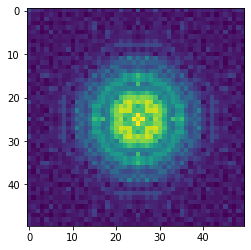

0.0884394645690918


In [12]:
inicio = time.time()
z2 = 63*mm
f_prop = A_apx(mask2,dx,dy,z2,w_length)
fin=np.fft.ifft2(f_prop)
plt.figure()
plt.imshow((np.abs(fin)))
plt.show()
final = time.time()
print(final-inicio)

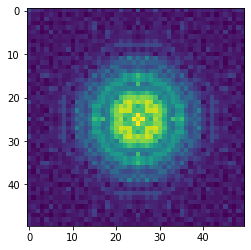

28.429385662078857


In [13]:
inicio2 = time.time()
z2 = 63*mm
f_prop = AS_DFT(mask2,dx,dy,z2,w_length)
fin=DFTI(f_prop)
plt.figure()
plt.imshow((np.abs(fin)))
plt.show()
final2 = time.time()
print(final2-inicio2)

### - Transformada de Fresnel

In [14]:
def T_fre_DFT(U_f,dx_f,dy_f,z_f,wave_length):
    
    k= 2*np.pi/wave_length
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(dx_f) 
    fY=Y*(dy_f)
    U_prima=(U_f*np.exp((-1j*k/(2*z_f))*((fX**2)+(fY**2)))) #U'
    U_dprima=np.fft.fftshift(DFT(U_prima*dx_f**2)) #U''
    
    C1=np.exp(1j*k*z_f)/(1j*wave_length*z_f) #e^(ikz)/ilambda z
    C2=(1j*k)/(2*z_f)#ik/2 z
    
    fXs=X*(wave_length*z_f/(N_f*dx_f))
    fYs=Y*(wave_length*z_f/(M_f*dy_f))
    
    U_sal=C1*np.exp(C2*(fXs**2+fYs**2))*U_dprima

    #plt.figure()
    #plt.imshow(np.angle(
    #U_prima))    
    #plt.show()
  
    #plt.figure()
    #plt.imshow(np.angle(U_dprima))    
    #plt.show()
    
    #plt.figure()
    #plt.imshow(np.angle(U_sal))    
    #plt.show()
    
    return U_sal

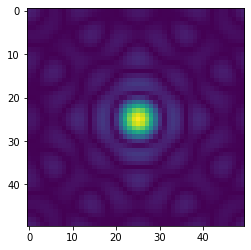

0.10485553741455078


In [15]:
inicio = time.time()
z2=742*um
T_prop=T_fre(mask2,dx,dy,z2,w_length)

plt.figure()
plt.imshow( 
    np.abs(T_prop)
        )
plt.show()
final = time.time()
print(final-inicio)

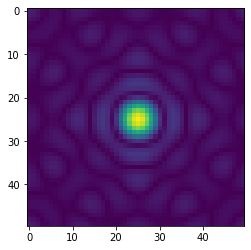

8.714601278305054


In [16]:
inicio2 = time.time()
z2 = 730*mm
f_prop = T_fre_DFT(mask2,dx,dy,z2,w_length)
plt.figure()
plt.imshow((np.abs(f_prop)))
plt.show()
final2 = time.time()
print(final2-inicio2)